# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Rizal Nur Arbaatun - 1301210044
2. Galih Akbar Nugraha - 1301213060
3. Muhammad Abiya Makruf - 1301213157

Tautan dataset yang digunakan:
1.   Dataset Letter Recognition (https://archive.ics.uci.edu/dataset/59/letter+recognition)



#### Latar Belakang
Dalam era perkembangan teknologi saat ini, penggunaan model Machine Learning telah menjadi aspek penting dalam berbagai bidang, termasuk dalam analisis dan pengenalan karakter alpabet. Salah satu metode yang telah terbukti efektif dalam tugas ini adalah menggunakan model RandomForest.

Pengenalan karakter melibatkan pemahaman pola dan korelasi antara koordinat x dan y dari setiap karakter. Dengan mengumpulkan dan menganalisis data koordinat tersebut, kita dapat mengidentifikasi pola unik yang terkait dengan setiap huruf. Dataset ini mencakup berbagai variabel, seperti posisi relatif titik-titik karakter, bentuk huruf.

Proses pengolahan data dimulai dengan pengumpulan dataset yang mencakup koordinat x dan y dari setiap karakter. Data ini kemudian diolah untuk menghilangkan noise atau gangguan yang tidak diinginkan dan disesuaikan agar sesuai dengan kebutuhan analisis. Dalam tahap analisis, metode statistik dan model Machine Learning, seperti RandomForest, dapat digunakan untuk mengidentifikasi pola dan korelasi dalam dataset.

Penerapan model RandomForest dalam pengenalan karakter memiliki potensi besar dalam berbagai konteks, termasuk dalam teknologi OCR (Optical Character Recognition), perbaikan penulisan otomatis, dan sektor-sektor lain yang membutuhkan analisis karakter. Hasil dari model ini dapat digunakan untuk meningkatkan keakuratan pengenalan karakter pada berbagai aplikasi, termasuk mesin penulisan otomatis, sistem pengenalan tulisan tangan.

Dengan mengembangkan model ini, kita dapat menciptakan solusi yang lebih baik dalam pengenalan karakter, mengurangi kesalahan, dan meningkatkan efisiensi dalam penggunaan teknologi pengenalan karakter. Hal ini memiliki potensi untuk memberikan kontribusi positif dalam berbagai sektor, termasuk teknologi informasi, perbankan, dan industri lain yang mengandalkan pengenalan karakter sebagai bagian penting dari operasional mereka.

## Eksplorasi Data

In [13]:
# Install ucimlrepo untuk download dari ucimlrepo
# Import Library yang digunakan dalam project
%pip install ucimlrepo
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Import Dataset dari uci ml repo
# Dataset yang digunakan adalah Letter Recognition
from ucimlrepo import fetch_ucirepo

# fetch dataset
letter_recognition = fetch_ucirepo(id=59)

# Buat DataFrame dari features dan targets
df = pd.DataFrame(data=letter_recognition.data.features, columns=letter_recognition.variables.name)
df['target'] = letter_recognition.data.targets
df = df.drop(df.columns[0], axis=1)

Mendownload dataset dari repo uci ml repo menggunakan library ucimlrepo. Data yang telah didownload diubah menjadi pandas dataframe agar mudah dianalisis, menambahkan kolom baru yang isinya merupakan target dan melakukan drop terhadap kolom indeks = 0 karena isinya merupakan NaN.

In [15]:
# Menampilkan informasi umum terhadap dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x-box   20000 non-null  int64 
 1   y-box   20000 non-null  int64 
 2   width   20000 non-null  int64 
 3   high    20000 non-null  int64 
 4   onpix   20000 non-null  int64 
 5   x-bar   20000 non-null  int64 
 6   y-bar   20000 non-null  int64 
 7   x2bar   20000 non-null  int64 
 8   y2bar   20000 non-null  int64 
 9   xybar   20000 non-null  int64 
 10  x2ybr   20000 non-null  int64 
 11  xy2br   20000 non-null  int64 
 12  x-ege   20000 non-null  int64 
 13  xegvy   20000 non-null  int64 
 14  y-ege   20000 non-null  int64 
 15  yegvx   20000 non-null  int64 
 16  target  20000 non-null  object
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


Berdasarkan informasi di atas, dataset letter recognition memiliki 17 kolom dan 20000 baris. Kolom indeks 0 - 15 merupakan kolom yang digunakan sebagai feature dan memiliki Dtype int64, sedangkan kolom indeks 16 merupakan kolom yang digunakan sebagai target dan memiliki Dtype object.

In [16]:
# Menampilkan 5 data teratas dari dataset
df.head()

name,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,target
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G


Berdasarkan hasil dari perintah .head() didapatkan contoh dari isi dataset sebanyak 5 data teratas. Terlihat bahwa masing-masing kolom memiliki nilai yang berbeda-beda.

In [17]:
# Menampilkan 5 data terbawah dari dataset
df.tail()

name,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,target
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,D
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,C
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,T
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,S
19999,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8,A


In [18]:
# Menampilkan data statistik dari dataset
# .T untuk transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
x-box,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
y-box,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
high,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
x-bar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
y-bar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0


<Axes: xlabel='name', ylabel='name'>

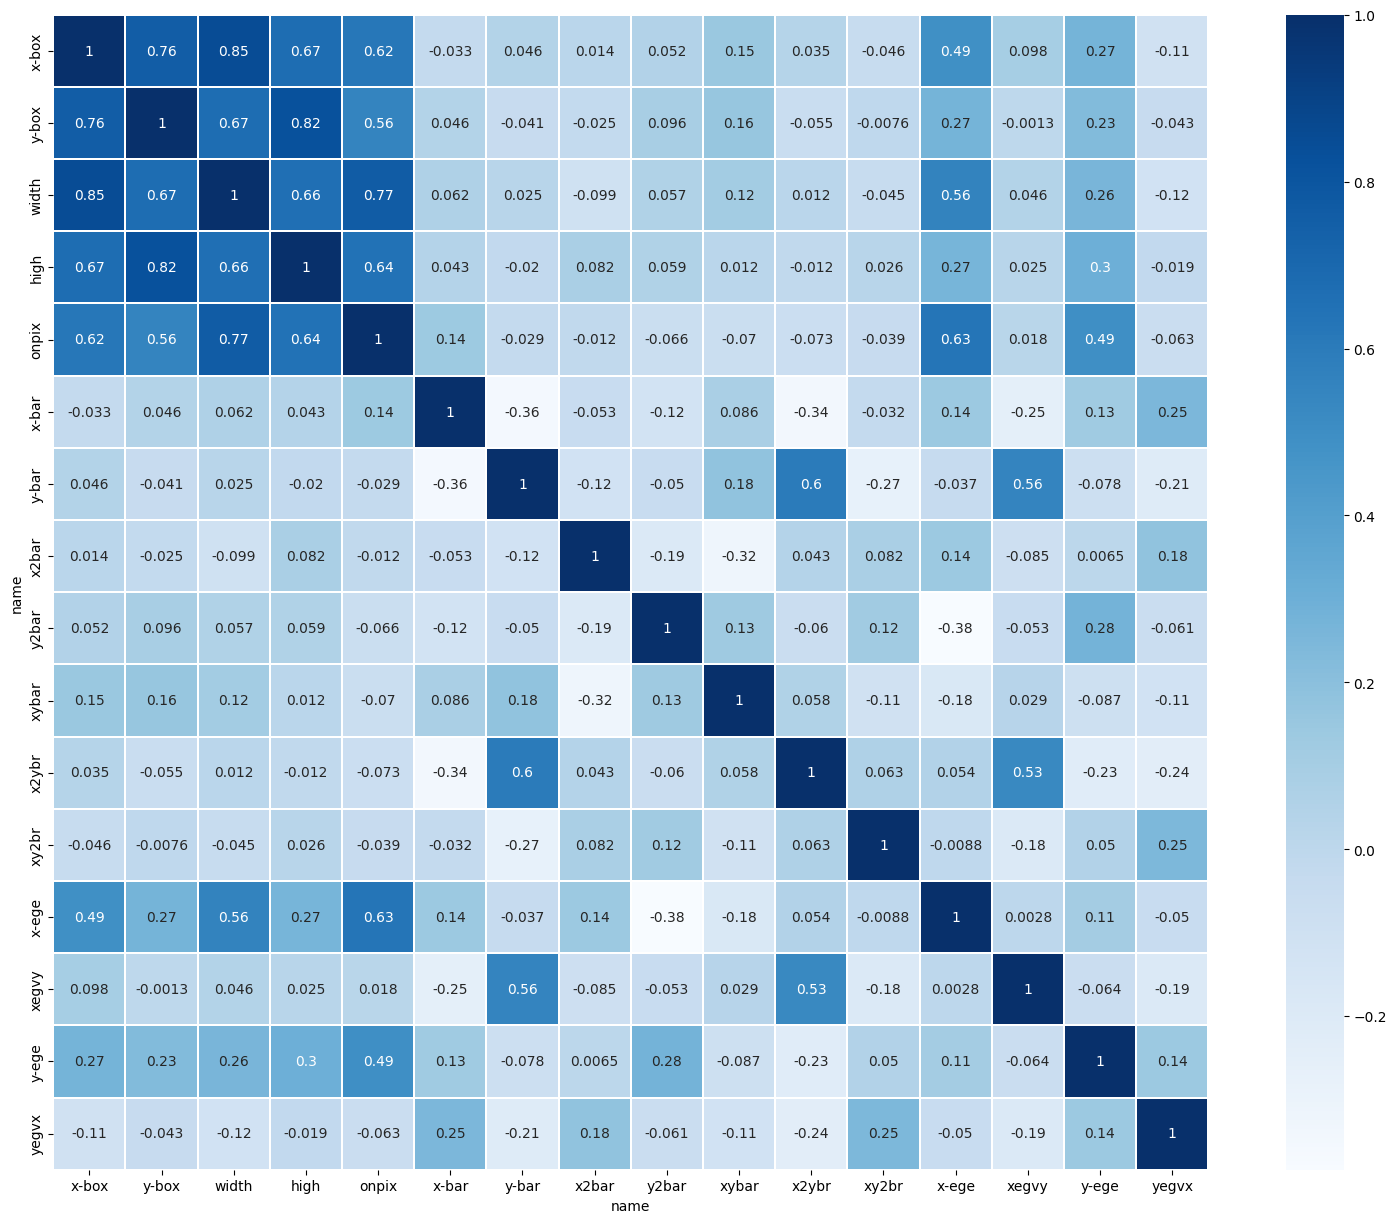

In [19]:
# Menampilkan korelasi antar feature menggunakan heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.select_dtypes(include='number').corr(), linewidths=0.01,
            square=True,annot=True,cmap="Blues")

Berdasarkan heatmap diatas ditemukan bahwa terdapat korelasi positif dan negatif antara semua feature. Meskipun begitu hanya terdapat sebagian saja yang korelasi nya mendekati 0.

In [20]:
# Menampilkan unique value dari target
unique = df['target'].unique()
print(unique)
print(len(unique))

['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']
26


Kolom target memiliki total sebanyak 26 class yaitu abjad dari A - Z.

<Axes: xlabel='count', ylabel='target'>

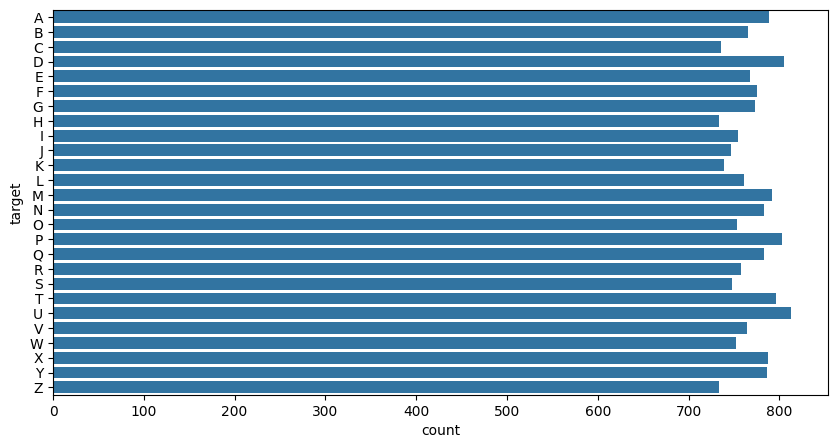

In [21]:
# Menampilkan distribusi class (target) sort berdasarkan abjad
plt.figure(figsize=(10, 5))
sns.countplot(df['target'], order=sorted(df['target'].unique()))

In [22]:
# Menampilkan banyak nya data per class sort berdasarkan abjad
df['target'].value_counts().sort_index()

target
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
Name: count, dtype: int64

Berdasarkan distribusi di atas dapat dilihat bahwa dataset memiliki class paling sedikit yaitu class H dan Z dengan total data sebanyak 734 dan memiliki class paling banyak yaitu class U dengan total data sebanyak 813.


Outlier Percentage of x-box: 2.41%
Outlier Percentage of y-box: 0.00%
Outlier Percentage of width: 2.87%
Outlier Percentage of high: 0.30%
Outlier Percentage of onpix: 1.47%
Outlier Percentage of x-bar: 4.09%
Outlier Percentage of y-bar: 2.11%
Outlier Percentage of x2bar: 3.75%
Outlier Percentage of y2bar: 0.80%
Outlier Percentage of xybar: 2.00%
Outlier Percentage of x2ybr: 2.71%
Outlier Percentage of xy2br: 4.81%
Outlier Percentage of x-ege: 2.71%
Outlier Percentage of xegvy: 20.14%
Outlier Percentage of y-ege: 1.30%
Outlier Percentage of yegvx: 1.21%


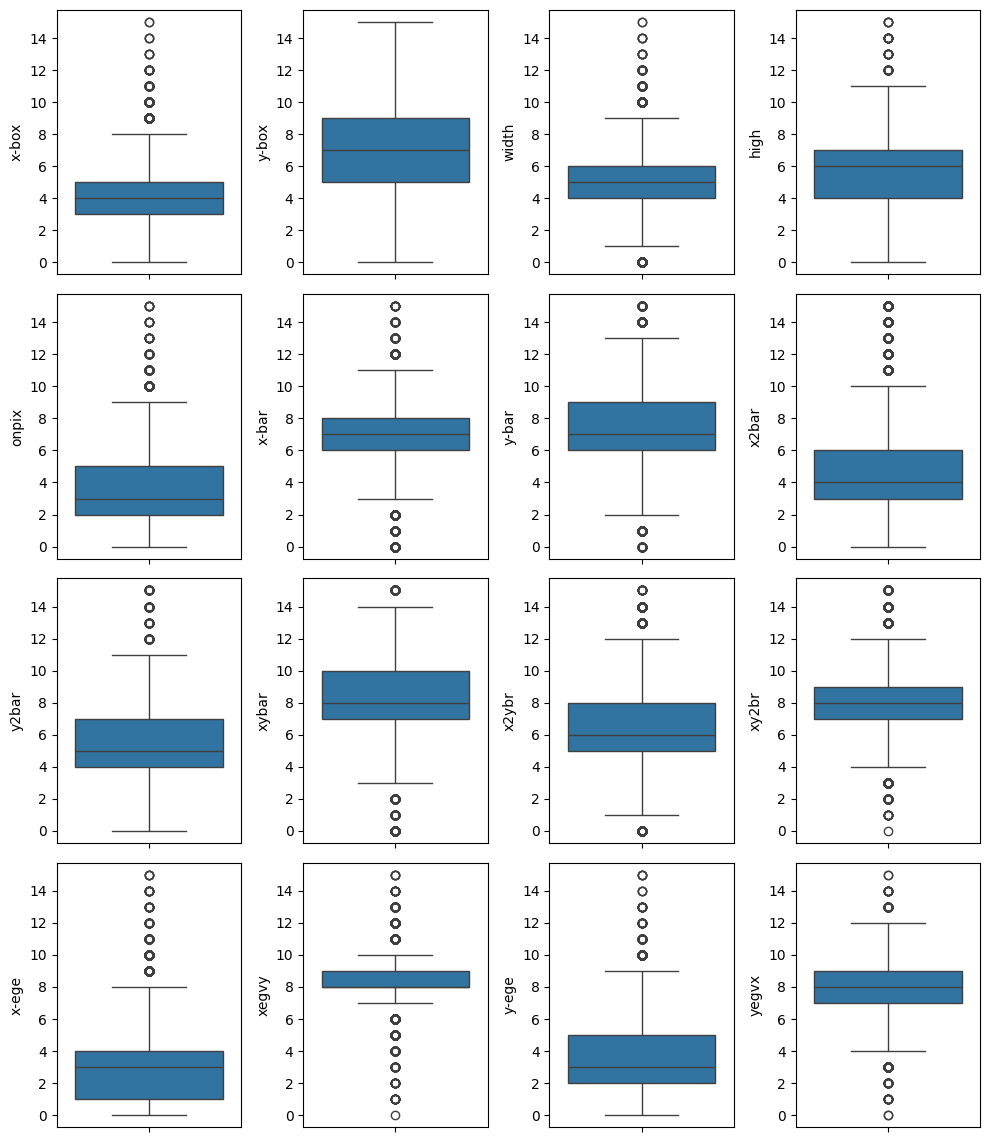

In [23]:
# Menampilkan box plot dari setiap feature
# Menampilkan persentasae outlier dari masing-masing feature
plt.figure(figsize=(10, 20))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(7, 4, i+1)
    sns.boxplot(df[col])
    plt.tight_layout()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    outlier = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_per = outlier / df.shape[0] * 100
    print(f'Outlier Percentage of {col}: {outlier_per:.2f}%')


Berdasarkan visualisasi boxplot hanya terdapat satu feature yaitu y-box yang tidak memiliki outlier. Berdasarkan persentase, feature xegvy memiliki persentase outlier paling besar yaitu 20.14%.

array([[<Axes: title={'center': 'x-box'}>,
        <Axes: title={'center': 'y-box'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'high'}>],
       [<Axes: title={'center': 'onpix'}>,
        <Axes: title={'center': 'x-bar'}>,
        <Axes: title={'center': 'y-bar'}>,
        <Axes: title={'center': 'x2bar'}>],
       [<Axes: title={'center': 'y2bar'}>,
        <Axes: title={'center': 'xybar'}>,
        <Axes: title={'center': 'x2ybr'}>,
        <Axes: title={'center': 'xy2br'}>],
       [<Axes: title={'center': 'x-ege'}>,
        <Axes: title={'center': 'xegvy'}>,
        <Axes: title={'center': 'y-ege'}>,
        <Axes: title={'center': 'yegvx'}>]], dtype=object)

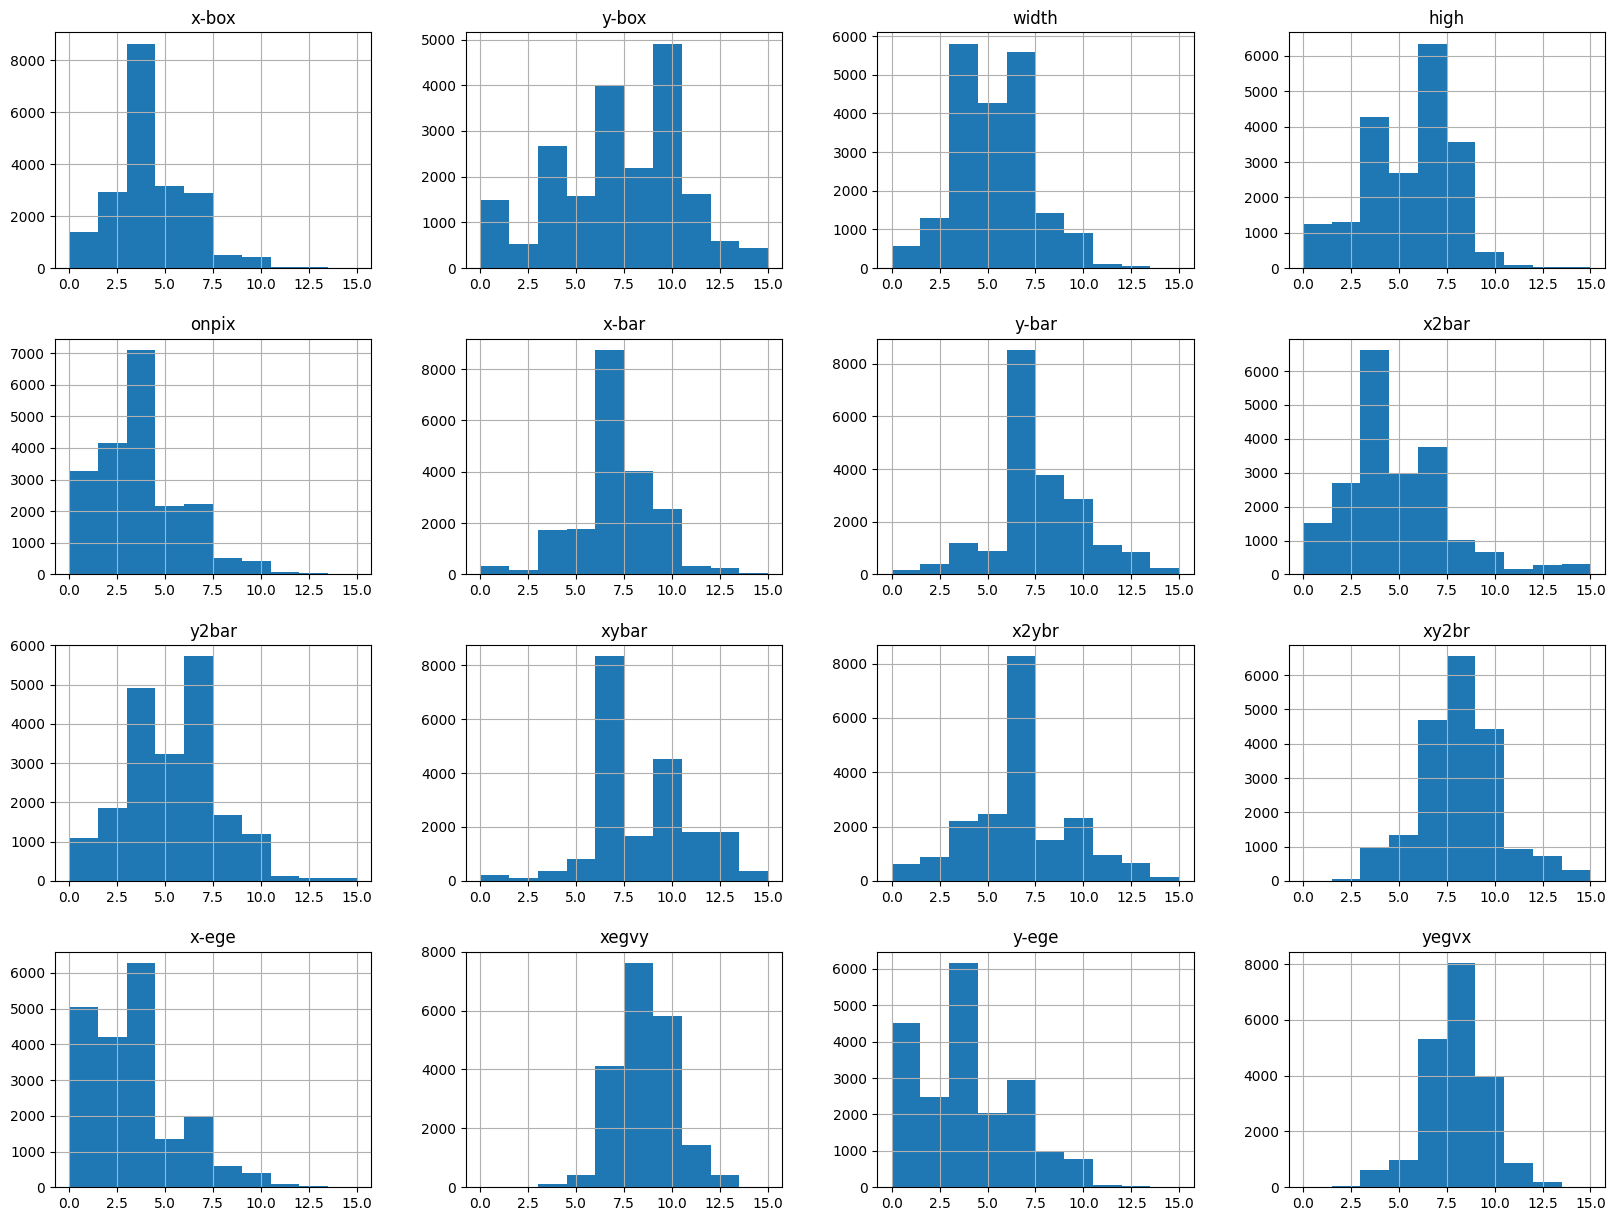

In [24]:
# Menampilkan histogram dari setiap feature
df.hist(figsize=(20, 15))


Berdasarkan visualisasi histogram persebaran masing-masing feature memiliki rata-rata range antara 0 - 15.

### Data Preprocessing

In [25]:
# Melakukan copy terhadap dataset original sehingga jika terjadi kesalahan pada dataset yang akan diolah, dataset original tidak akan berubah
data = df.copy()

In [26]:
# Pengecekan apakah dataset memiliki missing value
data.isnull().sum()

name
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
target    0
dtype: int64

Karena tidak ada feature yang memiliki missing value maka tidak dilakukan tindakan apapun.

In [27]:
# Pengecekan apakah dataset memiliki duplicate value
print(f'Jumlah duplicate value: {data.duplicated().sum()}')

# Menghapus duplicate value
if data.duplicated().sum() > 0:
    data.drop_duplicates(inplace=True)
    print('Duplicate value telah dihapus')

# Menampilkan duplicate value setelah dihapus
print(f'Jumlah duplicate value: {data.duplicated().sum()}')

Jumlah duplicate value: 1332
Duplicate value telah dihapus
Jumlah duplicate value: 0


Melakukan penghapusan terhadap value yang terdeteksi duplikat.

In [28]:
# Menampilkan 5 data ter atas
data.head()

name,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,target
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G


Kolom target harus dilakukan one hot encoding karena kolom target terdiri dari 26 class.

In [29]:
# Melakukan one hot encoding untuk kolom target
data = pd.get_dummies(data, columns=['target'])

# Melakukan konversi boolean ke integer
data = data*1

# Menampilkan 5 data teratas setelah dilakukan one hot encoding
data.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,target_Q,target_R,target_S,target_T,target_U,target_V,target_W,target_X,target_Y,target_Z
0,2,8,3,5,1,8,13,0,6,6,...,0,0,0,1,0,0,0,0,0,0
1,5,12,3,7,2,10,5,5,4,13,...,0,0,0,0,0,0,0,0,0,0
2,4,11,6,8,6,10,6,2,6,10,...,0,0,0,0,0,0,0,0,0,0
3,7,11,6,6,3,5,9,4,6,4,...,0,0,0,0,0,0,0,0,0,0
4,2,1,3,1,1,8,6,6,6,6,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data.iloc[:, 16:].head()

,target_A,target_B,target_C,target_D,target_E,target_F,target_G,target_H,target_I,target_J,...,target_Q,target_R,target_S,target_T,target_U,target_V,target_W,target_X,target_Y,target_Z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Kolom target telah berhasil dilakukan one hot encoding dan kolom target otomatis dilakukan drop.

In [31]:
# Memisahkan feature dan target. Feature dari indeks 0 - 16, target dari indeks 16 - terakhir
X = data.iloc[:, :16]
y = data.iloc[:, 16:]

Outlier Percentage of x-box: 2.58%
Outlier Percentage of y-box: 0.00%
Outlier Percentage of width: 2.29%
Outlier Percentage of high: 0.32%


Outlier Percentage of onpix: 1.56%
Outlier Percentage of x-bar: 3.93%
Outlier Percentage of y-bar: 1.83%
Outlier Percentage of x2bar: 3.19%
Outlier Percentage of y2bar: 0.56%
Outlier Percentage of xybar: 1.77%
Outlier Percentage of x2ybr: 2.45%
Outlier Percentage of xy2br: 4.90%
Outlier Percentage of x-ege: 5.83%
Outlier Percentage of xegvy: 20.79%
Outlier Percentage of y-ege: 1.38%
Outlier Percentage of yegvx: 1.30%


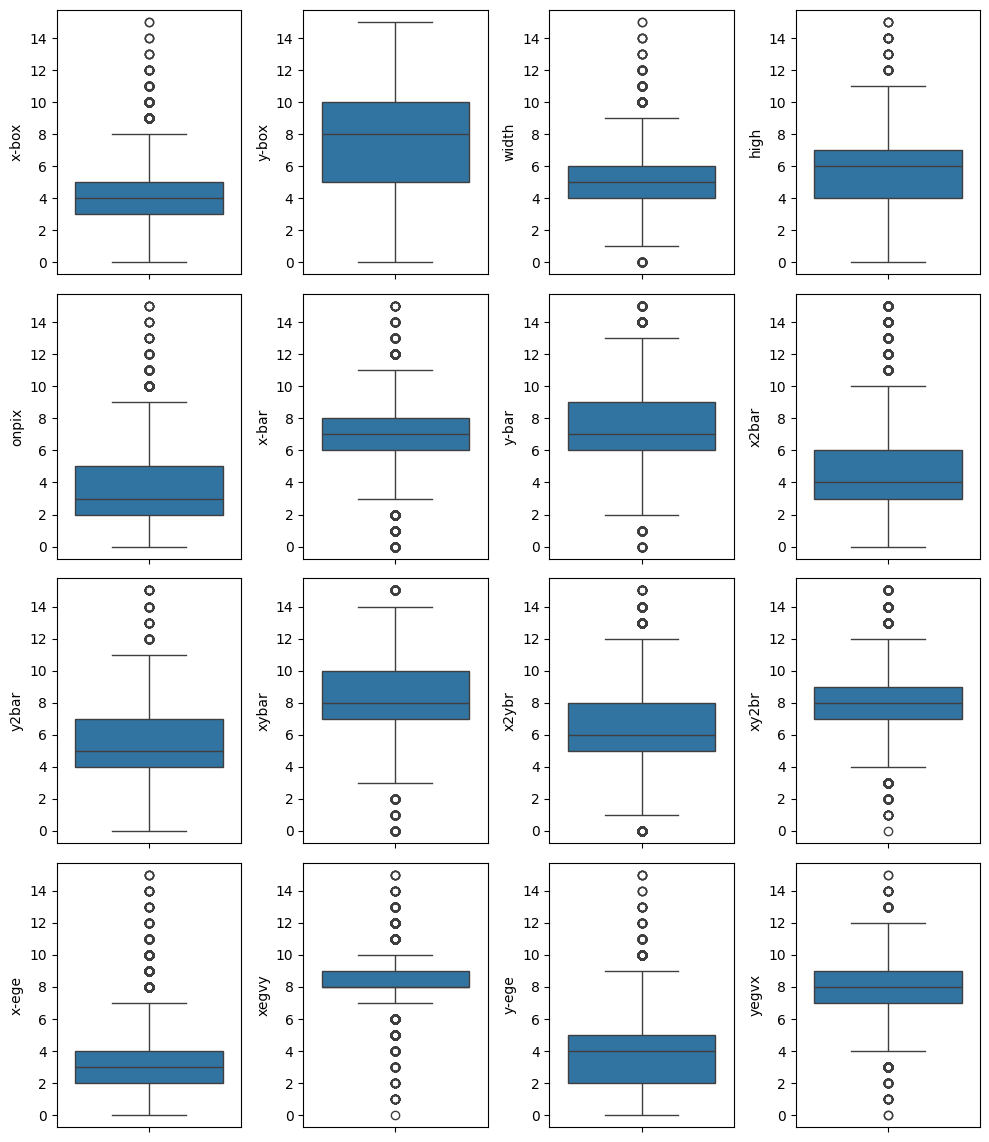

In [32]:
# Menampilkan box plot dari setiap feature
# Menampilkan persentasae outlier dari masing-masing feature
plt.figure(figsize=(10, 20))
for i, col in enumerate(X):
    plt.subplot(7, 4, i+1)
    sns.boxplot(X[col])
    plt.tight_layout()
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    outlier = X[(X[col] < lower) | (X[col] > upper)].shape[0]
    outlier_per = outlier / X.shape[0] * 100
    print(f'Outlier Percentage of {col}: {outlier_per:.2f}%')

Terlihat bahwa hampir semua feature memiliki outlier, maka dari itu akan dilakukan handling terhadap outlier.

In [33]:
# # Melakukan handling terhadap outlier
# def replace_oulier(data):
#   data = data.copy()
#   for col in data.columns :
#     q1 = data[col].quantile(q=0.25)
#     q3 = data[col].quantile(q=0.75)
#     upperOutlier = q3 + 1.5 * (q3-q1)
#     lowerOutlier = q1 - 1.5 * (q3-q1)

#     data.loc[data[col] > upperOutlier, col] = upperOutlier
#     data.loc[data[col] < lowerOutlier, col] = lowerOutlier

#   return data

# X = replace_oulier(X)

Outlier Percentage of x-box: 2.58%
Outlier Percentage of y-box: 0.00%
Outlier Percentage of width: 2.29%
Outlier Percentage of high: 0.32%
Outlier Percentage of onpix: 1.56%
Outlier Percentage of x-bar: 3.93%
Outlier Percentage of y-bar: 1.83%
Outlier Percentage of x2bar: 3.19%
Outlier Percentage of y2bar: 0.56%
Outlier Percentage of xybar: 1.77%
Outlier Percentage of x2ybr: 2.45%
Outlier Percentage of xy2br: 4.90%
Outlier Percentage of x-ege: 5.83%
Outlier Percentage of xegvy: 20.79%
Outlier Percentage of y-ege: 1.38%
Outlier Percentage of yegvx: 1.30%


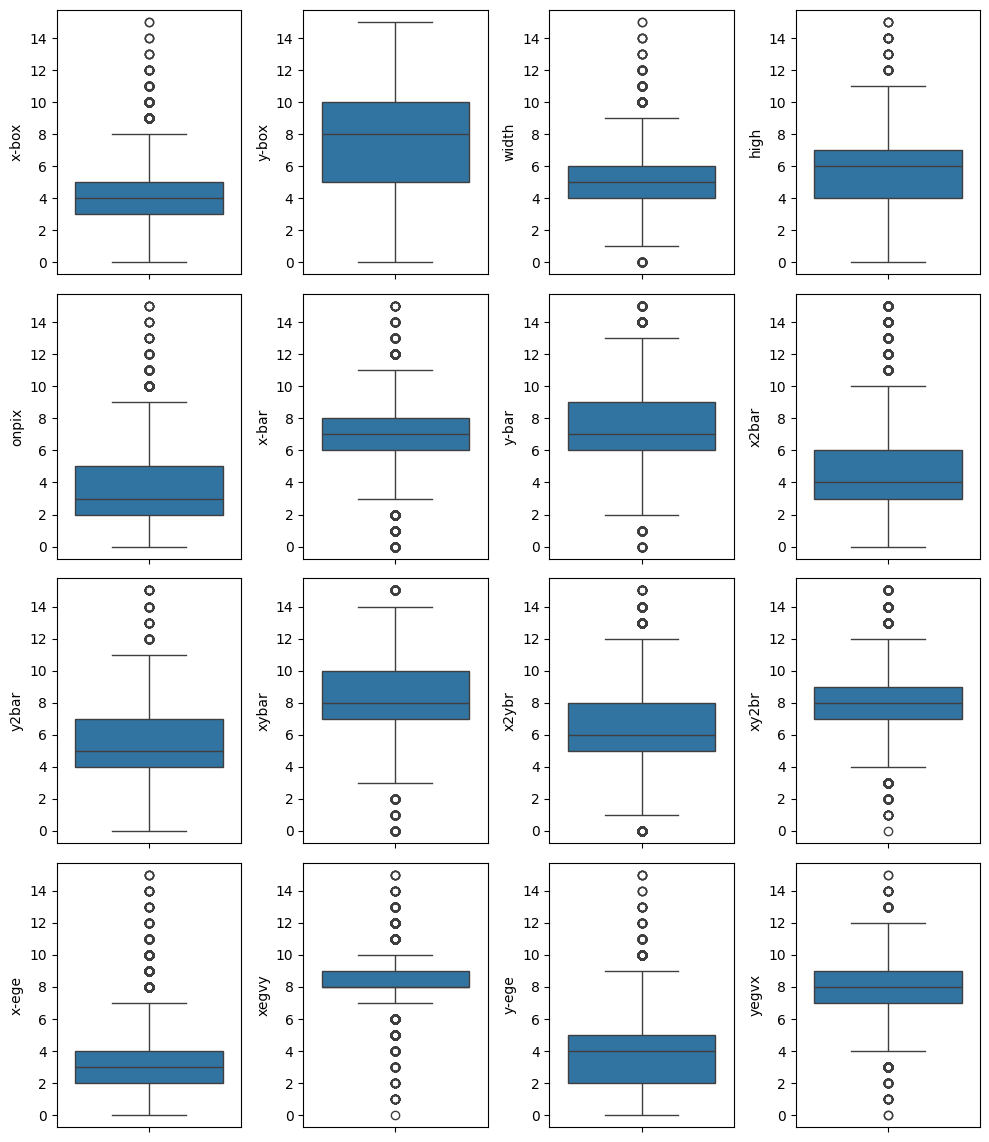

In [34]:
# Menampilkan box plot dari setiap feature
# Menampilkan persentasae outlier dari masing-masing feature
plt.figure(figsize=(10, 20))
for i, col in enumerate(X):
    plt.subplot(7, 4, i+1)
    sns.boxplot(X[col])
    plt.tight_layout()
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    outlier = X[(X[col] < lower) | (X[col] > upper)].shape[0]
    outlier_per = outlier / X.shape[0] * 100
    print(f'Outlier Percentage of {col}: {outlier_per:.2f}%')

Hasil dari histogram setelah dilakukan handling terhadap outlier.

array([[<Axes: title={'center': 'x-box'}>,
        <Axes: title={'center': 'y-box'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'high'}>],
       [<Axes: title={'center': 'onpix'}>,
        <Axes: title={'center': 'x-bar'}>,
        <Axes: title={'center': 'y-bar'}>,
        <Axes: title={'center': 'x2bar'}>],
       [<Axes: title={'center': 'y2bar'}>,
        <Axes: title={'center': 'xybar'}>,
        <Axes: title={'center': 'x2ybr'}>,
        <Axes: title={'center': 'xy2br'}>],
       [<Axes: title={'center': 'x-ege'}>,
        <Axes: title={'center': 'xegvy'}>,
        <Axes: title={'center': 'y-ege'}>,
        <Axes: title={'center': 'yegvx'}>]], dtype=object)

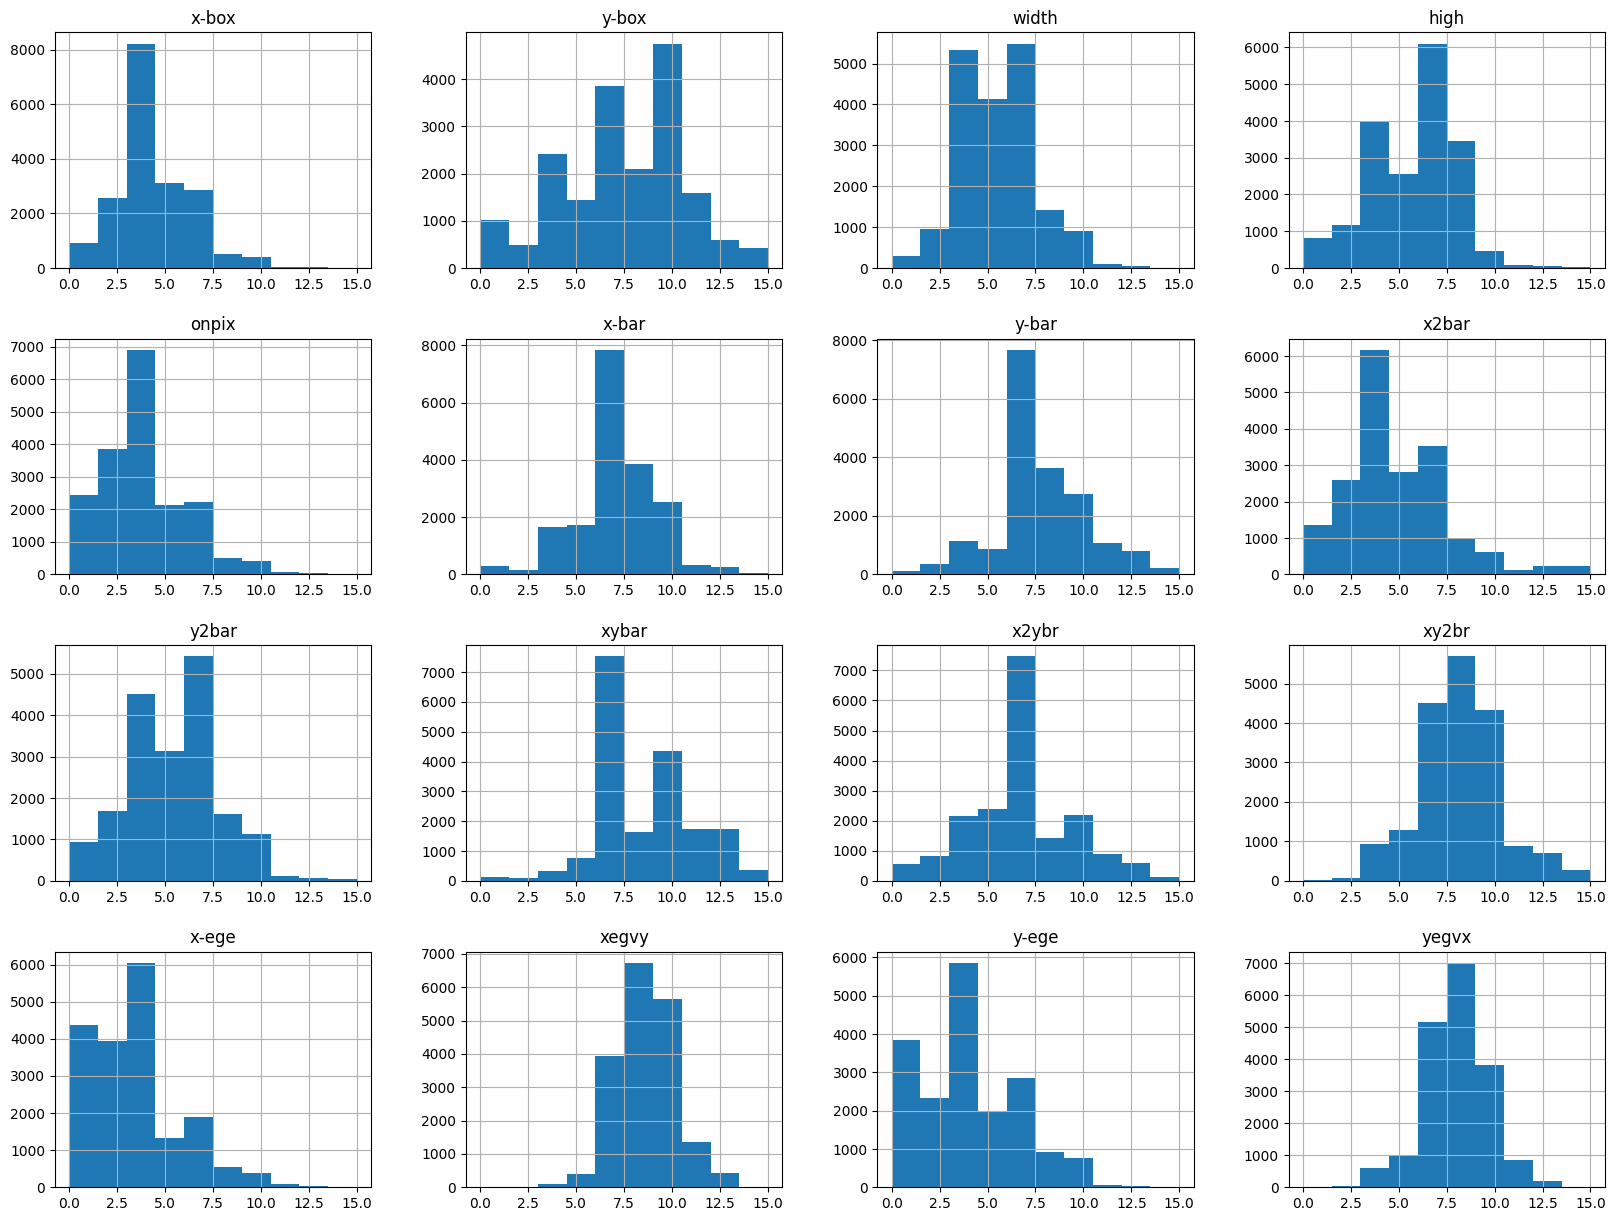

In [35]:
# Menampilkan histogram dari feature
X.hist(figsize=(20, 15))

In [36]:
# # Fungsi normalisasi terhadap data
# def minMaxScaler(df) :
#     scaledDf = df.copy()

#     for col in df.columns :
#         unique_values = df[col].unique()
#         print(f"colum: {col}, length: {len(unique_values)}")
#         if len(unique_values) > 2:
#           minVal = df[col].min()
#           maxVal = df[col].max()
#           scaledDf[col] = (df[col] - minVal) / (maxVal - minVal)

#     return scaledDf

# # Melakukan nomralisasi terhadap feature
# X = minMaxScaler(X)

array([[<Axes: title={'center': 'x-box'}>,
        <Axes: title={'center': 'y-box'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'high'}>],
       [<Axes: title={'center': 'onpix'}>,
        <Axes: title={'center': 'x-bar'}>,
        <Axes: title={'center': 'y-bar'}>,
        <Axes: title={'center': 'x2bar'}>],
       [<Axes: title={'center': 'y2bar'}>,
        <Axes: title={'center': 'xybar'}>,
        <Axes: title={'center': 'x2ybr'}>,
        <Axes: title={'center': 'xy2br'}>],
       [<Axes: title={'center': 'x-ege'}>,
        <Axes: title={'center': 'xegvy'}>,
        <Axes: title={'center': 'y-ege'}>,
        <Axes: title={'center': 'yegvx'}>]], dtype=object)

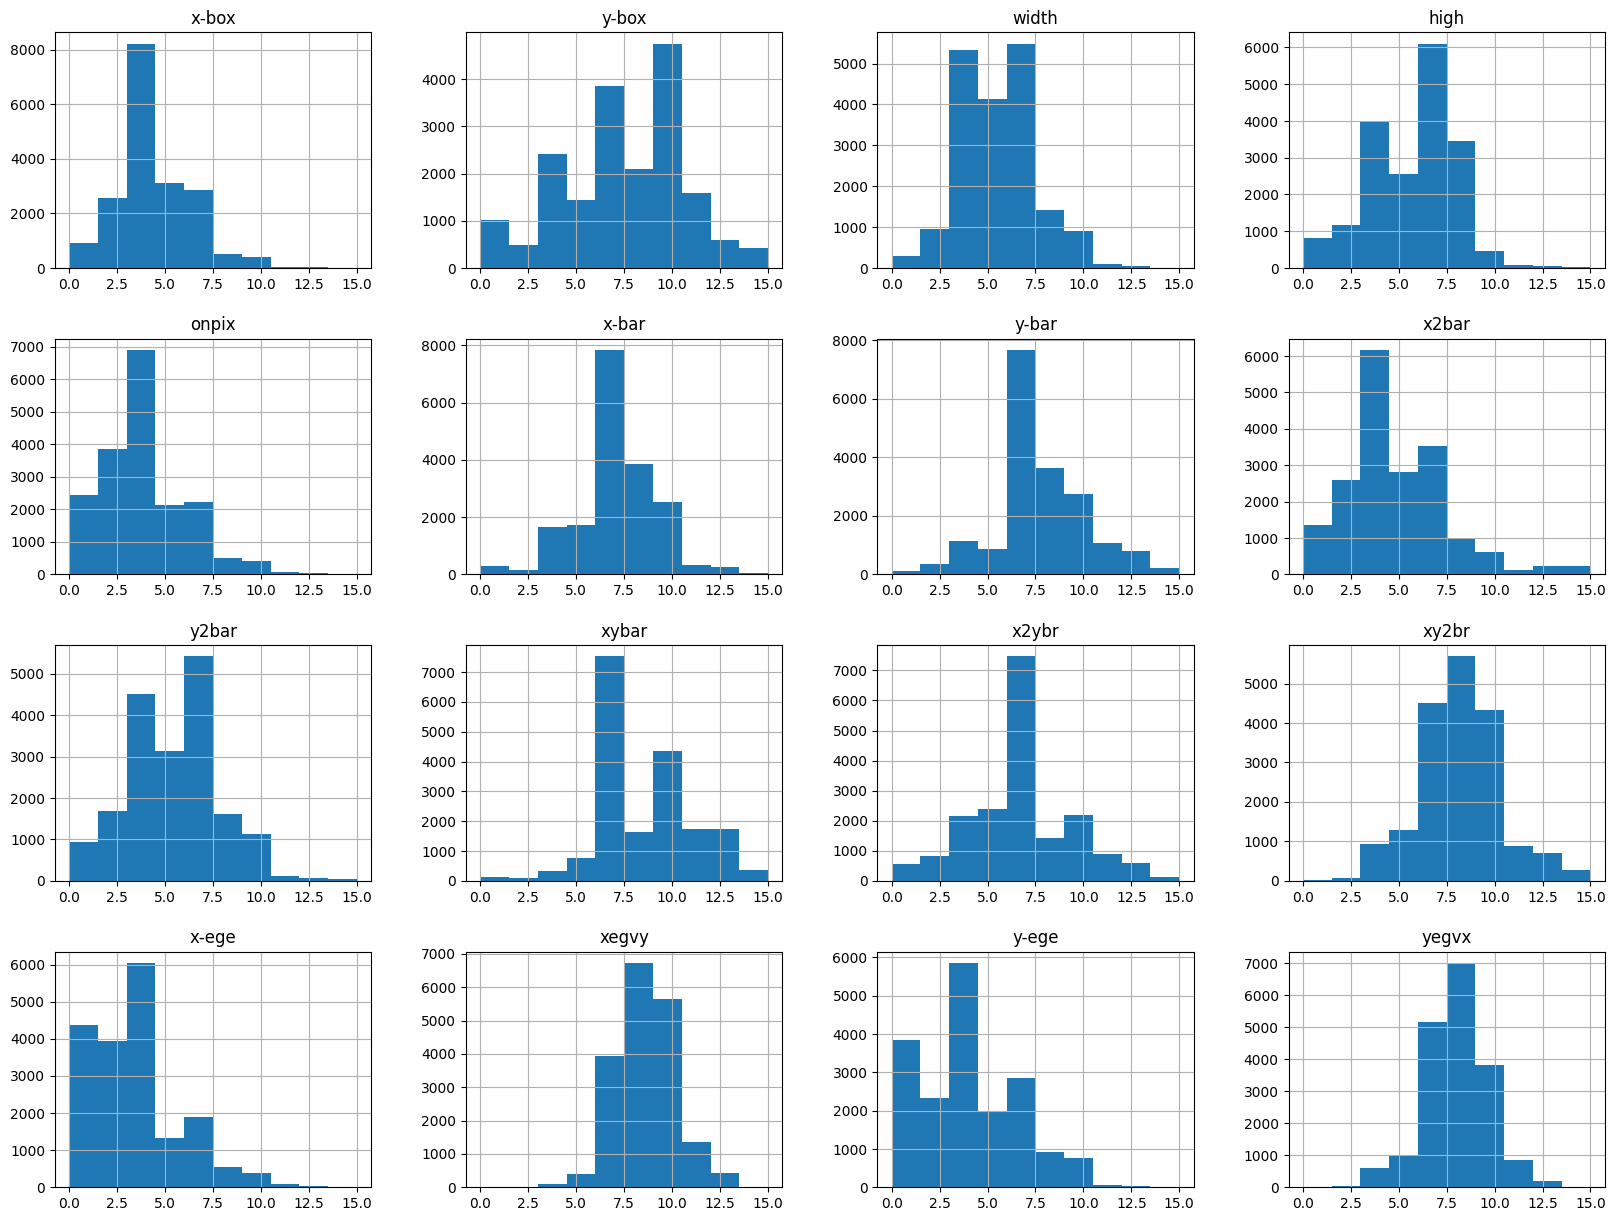

In [37]:
# Menampilkan histogram dari feature
X.hist(figsize=(20, 15))

Histogram setelah feature dilakukan normalisasi min-max scaler sehingga range data antara 0-1.

In [38]:
# Split data train dan data test
# 80% data untuk Train, 20% data untuk Test
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)

## Eksplorasi Model

### Ringkasan Metode
RandomForest adalah model Machine Learning yang termasuk dalam kategori ensemble learning, yang menggabungkan beberapa model ke dalam satu kesatuan untuk meningkatkan kinerja. Model ini terdiri dari sejumlah besar pohon keputusan yang bekerja bersama-sama untuk melakukan prediksi. Terdapat banyak hyperparameter yang dapat digunakan pada model RandomForest yang dapat memengaruhi hasil prediksi. Berikut adalah beberapa hyperparameter yang digunakan pada model RandomForest kami :

1. Jumlah Pohon (n_estimators): Jumlah pohon dalam ensemble. Penambahan jumlah pohon dapat meningkatkan kestabilan model, tetapi perlu diperhatikan agar tidak menyebabkan overfitting.
2. Kedalaman Pohon (max_depth): Kedalaman maksimum setiap pohon. Menentukan sejauh mana pohon dapat tumbuh. Kedalaman yang terlalu dalam dapat menyebabkan overfitting, sedangkan kedalaman yang terlalu dangkal dapat mengurangi kemampuan model untuk memahami pola kompleks.
3. Min Split Samples (min_samples_split): Jumlah sampel minimum yang diperlukan untuk membagi simpul. Menentukan seberapa besar dataset harus untuk pemisahan tambahan.
4. Min Samples Leaf (min_samples_leaf): Jumlah sampel minimum yang diperlukan untuk menjadi daun (leaf) pada pohon. Menentukan ukuran minimum setiap daun dan dapat membantu mengontrol overfitting.
5. Bootstrap: Menentukan apakah sampel bootstrap harus digunakan saat membangun pohon. Jika diatur sebagai True, ini memungkinkan pengambilan sampel acak dengan penggantian, yang penting untuk variasi antar pohon.


### Baseline Model

In [39]:
# Membuat Baseline model decision tree
clf = tree.DecisionTreeClassifier(max_depth= 2)
clf = clf.fit(xTrain, yTrain)

In [40]:
# Melakukan prediksi terhadap data test
y_pred = clf.predict(xTest)

# Calculate accuracy
accuracy = accuracy_score(yTest, y_pred)

# Print accuracy
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

# Print max depth
print(f"Max Depth: {clf.get_depth()}")

Decision Tree Accuracy: 5.76%
Max Depth: 2


Baseline model (decision tree) menghasilkan nilai accuracy yang sangat kecil yaitu 5,76% saja.

### Model Exploration

Model exploration dilakukan dengan menggunakan model random forest, kemudian melakukan grid search cv untuk mencari kombinasi parameter terbaik.

In [57]:
rf_classifier = RandomForestClassifier()

# Tentukan ruang parameter yang akan dijelajahi
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Lakukan grid search
grid_search.fit(xTrain, yTrain)

# Dapatkan semua hasil grid search dalam bentuk DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Tampilkan hasil terbaik
print("Parameter terbaik:", grid_search.best_params_)
print("Akurasi model terbaik: {:.2f}%".format(grid_search.best_score_ * 100))

# Tampilkan 5 parameter terbaik
print("\n5 Akurasi Terbaik:")
top_5_results = results_df.nlargest(5, 'mean_test_score')[['params', 'mean_test_score']]
print(top_5_results)

# Tampilkan 5 parameter terburuk
print("\n5 Akurasi Terburuk:")
bottom_5_results = results_df.nsmallest(5, 'mean_test_score')[['params', 'mean_test_score']]
print(bottom_5_results)

Parameter terbaik: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Akurasi model terbaik: 86.81%

5 Akurasi Terbaik:
                                               params  mean_test_score  \
16  {'bootstrap': False, 'max_depth': None, 'min_s...         0.868086   
17  {'bootstrap': False, 'max_depth': None, 'min_s...         0.867952   
19  {'bootstrap': False, 'max_depth': None, 'min_s...         0.851614   
18  {'bootstrap': False, 'max_depth': None, 'min_s...         0.849872   
21  {'bootstrap': False, 'max_depth': None, 'min_s...         0.844315   

    std_test_score  
16        0.004239  
17        0.002796  
19        0.003569  
18        0.007344  
21        0.005208  

5 Akurasi Terburuk:
                                               params  mean_test_score  \
31  {'bootstrap': False, 'max_depth': 5, 'min_samp...         0.123141   
8   {'bootstrap': True, 'max_depth': 5, 'min_sampl...         0.123677   
24  {'boot

Berdasarkan hasil dari gridsearchCV yang telah dilakukan didapatkan kombinasi parameter terbaik yaitu {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}. Parameter terbaik ini akan digunakan untuk membuat model evaluasi yang nantinya akan dibandingkan dengan baseline model.

In [58]:
# Memilih parameter terbaik
best_params = grid_search.best_params_
best_params

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [59]:
# Membuat model dengan parameter terbaik
bst = best_params
rf_classifier = RandomForestClassifier(bootstrap=bst['bootstrap'],max_depth=bst['max_depth'],min_samples_leaf=bst['min_samples_leaf'],min_samples_split=bst['min_samples_split'],n_estimators=bst['n_estimators'])
rf_classifier.fit(xTrain, yTrain)
y_pred = rf_classifier.predict(xTest)

# Calculate accuracy
accuracy = accuracy_score(yTest, y_pred)

# Print accuracy
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 88.27%


Berdasarkan best parameter yang didapatkan dari grid search, dibangun kembali sebuah model random forest. Model random forest yang menggunakan parameter tersebut memberikan nilai accuracy sebesar 88,27%.

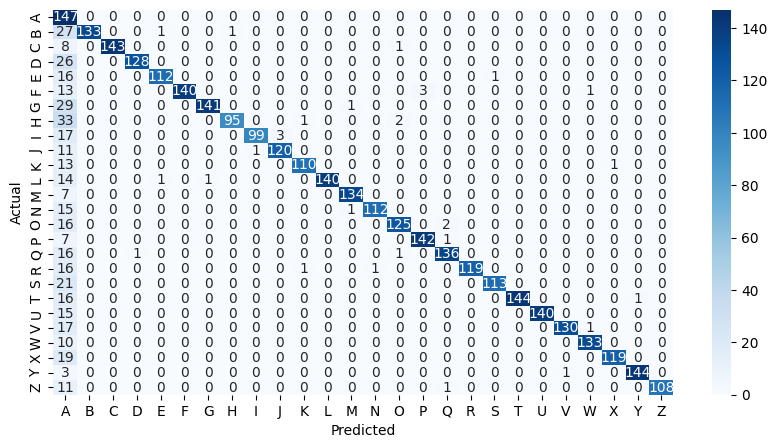

In [60]:
# Menampilkan confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest.values.argmax(axis=1), y_pred.argmax(axis=1))

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(10, 5))
labelList = [chr(label+65) for label in range(26)]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labelList, yticklabels=labelList)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Confusion matrix memberikan visualisasi terhadap kinerja model. Hampir semua actual velue bisa di prediksi dengan benar.

In [61]:
# Menampilkan classification report
from sklearn.metrics import classification_report
print(classification_report(yTest.values.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.27      1.00      0.43       147
           1       1.00      0.82      0.90       162
           2       1.00      0.94      0.97       152
           3       0.99      0.83      0.90       154
           4       0.98      0.87      0.92       129
           5       1.00      0.89      0.94       157
           6       0.99      0.82      0.90       171
           7       0.99      0.73      0.84       131
           8       0.99      0.83      0.90       119
           9       0.98      0.91      0.94       132
          10       0.98      0.89      0.93       124
          11       1.00      0.90      0.95       156
          12       0.99      0.95      0.97       141
          13       0.99      0.88      0.93       128
          14       0.97      0.87      0.92       143
          15       0.98      0.95      0.96       150
          16       0.97      0.88      0.93       154
          17       1.00    

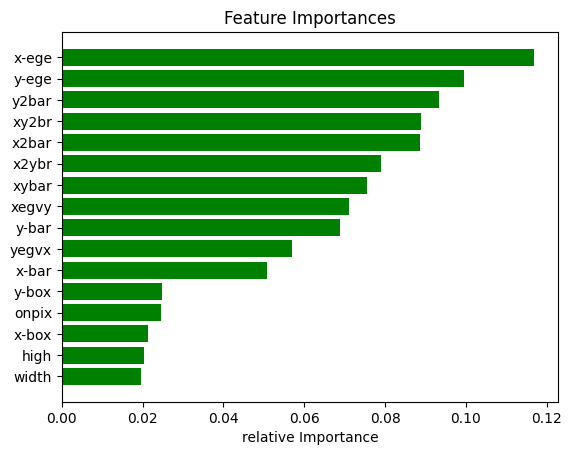

In [62]:
features = X.columns
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("relative Importance")
plt.show()

Feature yang memiliki pengaruh paling besar adalah x-ege dan feature yang memiliki pengaruh paling kecil adalah width.

## Hasil dan Analisis

Performa model Random Forest pada klasifikasi dapat diukur dengan menggunakan beberapa metrik evaluasi, terutama akurasi (accuracy). Akurasi digunakan untuk mengukur sejauh mana model dapat mengklasifikasikan data dengan benar. Semakin tinggi nilai akurasi, semakin baik kualitas modelnya. Berikut adalah rumus untuk menghitung akurasi:

        Accuracy = (TP + TN) / (TP + TN + FP + FN)

keterangan:

- TP (True Positives): Jumlah instance positif yang benar-benar diklasifikasikan dengan benar oleh model.
- TN (True Negatives): Jumlah instance negatif yang benar-benar diklasifikasikan dengan benar oleh model.
- FP (False Positives): Jumlah instance negatif yang keliru diklasifikasikan sebagai positif oleh model.
- FN (False Negatives): Jumlah instance positif yang keliru diklasifikasikan sebagai negatif oleh model.

Untuk mendapatkan nilai akurasi yang tinggi, perlu memperhatikan beberapa parameter dalam model Random Forest, seperti jumlah pohon (n_estimators), kedalaman maksimal pohon (max_depth), dan parameter lain yang dapat memengaruhi kinerja model.

Berdasarkan model yang kami buat, kami melakukan perbandingan dengan baseline model. Untuk baseline model hanya menghasilkan akurasi sebesar 5.76% dengan hyperparameter max_depth adalah dua, sedangkan pada model RandomForest menghasilkan akurasi sebesar 88.27%.

Selain perbandingan antara base model dengan model Random Forest, kami melakukan pengujian dengan jumlah data yang digunakan, terdapat model yang menggunakan jumlah data sebesar 5000 data, 10000 data, 15000 data, dan 20000 data.
Untuk model yang menggunakan jumlah data sebesar 5000 data menghasilkan tingkat akurasi sebesar 75.70%, untuk model yang menggunakan jumlah data sebesar 10000 data menghasilkan tingkat akurasi sebesar 83.70%, untuk model yang menggunakan jumlah data sebesar 15000 data menghasilkan tingkat akurasi sebesar 86.93%, dan untuk model yang menggunakan jumlah data sebesar 20000 data menghasilkan tingkat akurasi sebesar 88.27%. Dari keempat model yang telah diuji, keempat model tersebut memiliki hyper parameter yang sama, antara lain :

        max_depth = None
        bootstrap = False
        min_samples_leaf = 1
        min_samples_split = 2
        n_estimators = 50



#### Kesimpulan

RandomForest adalah model Machine Learning yang termasuk dalam kategori ensemble learning, yang menggabungkan beberapa model ke dalam satu kesatuan untuk meningkatkan kinerja. Model ini terdiri dari sejumlah besar pohon keputusan yang bekerja bersama-sama untuk melakukan prediksi. Baseline model, yang menggunakan hyperparameter max_depth sebesar dua, menghasilkan akurasi sebesar 5.76%. Di sisi lain, model Random Forest dengan hyperparameter yang dioptimalkan, antara lain max_depth yang tidak dibatasi (None), bootstrap yang dinonaktifkan (False), min_samples_leaf sebesar satu, min_samples_split sebesar dua, dan n_estimators sebesar 50, mampu mencapai akurasi sebesar 88.27%.

Selanjutnya pengujian dengan variasi jumlah data yang digunakan. Model yang menggunakan jumlah data sebesar 5000, 10000, 15000, dan 20000 menunjukkan peningkatan akurasi seiring dengan peningkatan jumlah data. Hasilnya tingkat akurasinya adalah sebagai berikut:

- Model dengan 5000 data: 75.70%
- Model dengan 10000 data: 83.70%
- Model dengan 15000 data: 86.93%
- Model dengan 20000 data: 88.27%

Dari empat model tersebut, seluruhnya menggunakan hyperparameter yang sama, menunjukkan bahwa Random Forest dapat secara efektif menangani peningkatan jumlah data dengan konsistensi peningkatan akurasi.



# Referensi

1. Decision Tree Clasifier(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
2. Random Forest (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
3. Grid Search CV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
4. Decision Tree (https://scikit-learn.org/stable/modules/tree.html)